![Cabec%CC%A7alho_notebook.png](cabecalho_notebook.png)

# Classificação de Atividade Humana com PCA

Vamos trabalhar com a base da demonstração feita em aula, mas vamos explorar um pouco melhor como é o desempenho da árvore variando o número de componentes principais.

In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier

from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


filename_features = "C:/DEV/Datasets/EBAC/PCA/UCI HAR Dataset/features.txt"
filename_labels = "C:/DEV/Datasets/EBAC/PCA/UCI HAR Dataset/activity_labels.txt"

filename_subtrain = "C:/DEV/Datasets/EBAC/PCA/UCI HAR Dataset/train/subject_train.txt"
filename_xtrain = "C:/DEV/Datasets/EBAC/PCA/UCI HAR Dataset/train/X_train.txt"
filename_ytrain = "C:/DEV/Datasets/EBAC/PCA/UCI HAR Dataset/train/y_train.txt"

filename_subtest = "C:/DEV/Datasets/EBAC/PCA/UCI HAR Dataset/test/subject_test.txt"
ffilename_xtest = "C:/DEV/Datasets/EBAC/PCA/UCI HAR Dataset/test/X_test.txt"
filename_ytest = "C:/DEV/Datasets/EBAC/PCA/UCI HAR Dataset/test/y_test.txt"

features = pd.read_csv(filename_features, header=None, names=['nome_var'], squeeze=True, sep="#")
labels = pd.read_csv(filename_labels, delim_whitespace=True, header=None, names=['cod_label', 'label'])

subject_train = pd.read_csv(filename_subtrain, header=None, names=['subject_id'], squeeze=True)
X_train = pd.read_csv(filename_xtrain, delim_whitespace=True, header=None, names=features.tolist())
y_train = pd.read_csv(filename_ytrain, header=None, names=['cod_label'])

subject_test = pd.read_csv(filename_subtest, header=None, names=['subject_id'], squeeze=True)
X_test = pd.read_csv(ffilename_xtest, delim_whitespace=True, header=None, names=features.tolist())
y_test = pd.read_csv(filename_ytest, header=None, names=['cod_label'])

C:\Users\Lucia\AppData\Local\Temp\ipykernel_21540\814926127.py:24: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  features = pd.read_csv(filename_features, header=None, names=['nome_var'], squeeze=True, sep="#")
C:\Users\Lucia\AppData\Local\Temp\ipykernel_21540\814926127.py:27: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  subject_train = pd.read_csv(filename_subtrain, header=None, names=['subject_id'], squeeze=True)
C:\Users\Lucia\AppData\Local\Temp\ipykernel_21540\814926127.py:31: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  subject_test = pd.read_csv(filename_subtest, header=None, names=['subject_id'], squeeze=True)


## PCA com variáveis padronizadas

Reflexão sobre a escala das variáveis:

**Variáveis em métricas muito diferentes** podem interferir na análise de componentes principais. Lembra que variância é informação pra nós? Pois bem, tipicamente se há uma variável monetária como salário, vai ter uma ordem de variabilidade bem maior que número de filhos, tempo de emprego ou qualquer variável dummy. Assim, as variáveis de maior variância tendem a "dominar" a análise. Nesses casos é comum usar a padronização das variáveis.

Faça duas análises de componentes principais para a base do HAR - com e sem padronização e compare:

- A variância explicada por componente
- A variância explicada acumulada por componente
- A variância percentual por componente
- A variância percentual acumulada por componente
- Quantas componentes você escolheria, em cada caso para explicar 90% da variância?

In [59]:
import numpy as np

def screeplot(princomp, ncomp = 0, varexplicada=0, criterio=1):
    
    if ncomp>0:
        ncomp_crit=ncomp
    elif varexplicada > 0:
        ncomp_crit = (princomp.explained_variance_ratio_.cumsum()<varexplicada).sum()+1 
        # Critério 1: autovalor padronizado > 1
    elif criterio == 1:
        ncomp_crit = (princomp.explained_variance_ratio_>1/princomp.n_components_).sum()
    else: ncomp_crit = None
    
    fig, ax = plt.subplots(2, 2, sharex=True, figsize=(14, 8))
    plt.subplots_adjust(hspace=0, wspace=.15)


    num_componentes = np.arange(princomp.n_components_) + 1
    ax[0,0].plot(num_componentes, princomp.explained_variance_, 'o-', linewidth=2, color='blue', markersize=2, alpha=.2)
    ax[0,0].set_title('Scree Plot - Variância total')
    ax[0,0].set_xlabel('Número de componentes')
    ax[0,0].set_ylabel('Variancia explicada (Autovalores)')

    ax[1,0].plot(num_componentes, princomp.explained_variance_.cumsum(), 'o-', linewidth=2, color='blue', markersize=2, alpha=.2)
    ax[1,0].set_xlabel('Número de componentes')
    ax[1,0].set_ylabel('Variancia explicada (Acumulada)')


    ax[0,1].plot(num_componentes, princomp.explained_variance_ratio_, 'o-', linewidth=2, color='blue', markersize=2, alpha=.2)
    ax[0,1].set_title('Scree Plot - Variância percentual')
    ax[0,1].set_xlabel('Número de componentes')
    ax[0,1].set_ylabel('Variancia explicada (percentual)')

    ax[1,1].plot(num_componentes, princomp.explained_variance_ratio_.cumsum(), 'o-', linewidth=2, color='blue', markersize=2, alpha=.2)
    ax[1,1].set_xlabel('Número de componentes')
    ax[1,1].set_ylabel('Variancia explicada (% Acumulado)')
    
    if ncomp_crit != None:
        # Linhas verticais de referência
        ax[0,0].axvline(x = ncomp_crit, color = 'r', linestyle = '-', linewidth=.5)
        ax[1,1].axvline(x = ncomp_crit, color = 'r', linestyle = '-', linewidth=.5)
        ax[1,0].axvline(x = ncomp_crit, color = 'r', linestyle = '-', linewidth=.5)
        ax[0,1].axvline(x = ncomp_crit, color = 'r', linestyle = '-', linewidth=.5)


        # linhas horizontais
        variancia               = princomp.explained_variance_[ncomp_crit-1]
        variancia_acumulada     = princomp.explained_variance_.cumsum()[ncomp_crit-1]
        pct_variancia           = princomp.explained_variance_ratio_[ncomp_crit-1]
        pct_variancia_acumulada = princomp.explained_variance_ratio_.cumsum()[ncomp_crit-1]
        
        ax[0,0].axhline(y = variancia              , color = 'r', linestyle = '-', linewidth=.5)
        ax[1,0].axhline(y = variancia_acumulada    , color = 'r', linestyle = '-', linewidth=.5)
        ax[0,1].axhline(y = pct_variancia          , color = 'r', linestyle = '-', linewidth=.5)
        ax[1,1].axhline(y = pct_variancia_acumulada, color = 'r', linestyle = '-', linewidth=.5)


    print(f'Número de componentes:............... {ncomp_crit}')
    print(f'Variância da ultima CP:.............. {variancia:.2f}' )
    print(f'Variância total explicada:........... {variancia_acumulada:.2f}' )
    print(f'Variância percentual da última CP:... {100*pct_variancia:.2f}%' )
    print(f'Variância percentual total explicada: {100*pct_variancia_acumulada:.2f}%' )
    plt.show()
    return ncomp_crit

In [60]:
%%time
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled[X_train_scaled.columns] = scaler.fit_transform(X_train)
X_test_scaled[X_test_scaled.columns] = scaler.transform(X_test)

print(' Non scaled')
print(X_train.iloc[:, 0].head(5), '\n')
print(' Scaled')
print(X_train_scaled.iloc[:, 0].head(5), '\n')

 Non scaled
0    0.288585
1    0.278419
2    0.279653
3    0.279174
4    0.276629
Name: 1 tBodyAcc-mean()-X, dtype: float64 

 Scaled
0    0.200642
1    0.055948
2    0.073515
3    0.066696
4    0.030469
Name: 1 tBodyAcc-mean()-X, dtype: float64 

CPU times: total: 453 ms
Wall time: 1.67 s


scaled
Número de componentes:............... 63
Variância da ultima CP:.............. 0.99
Variância total explicada:........... 505.27
Variância percentual da última CP:... 0.18%
Variância percentual total explicada: 90.05%


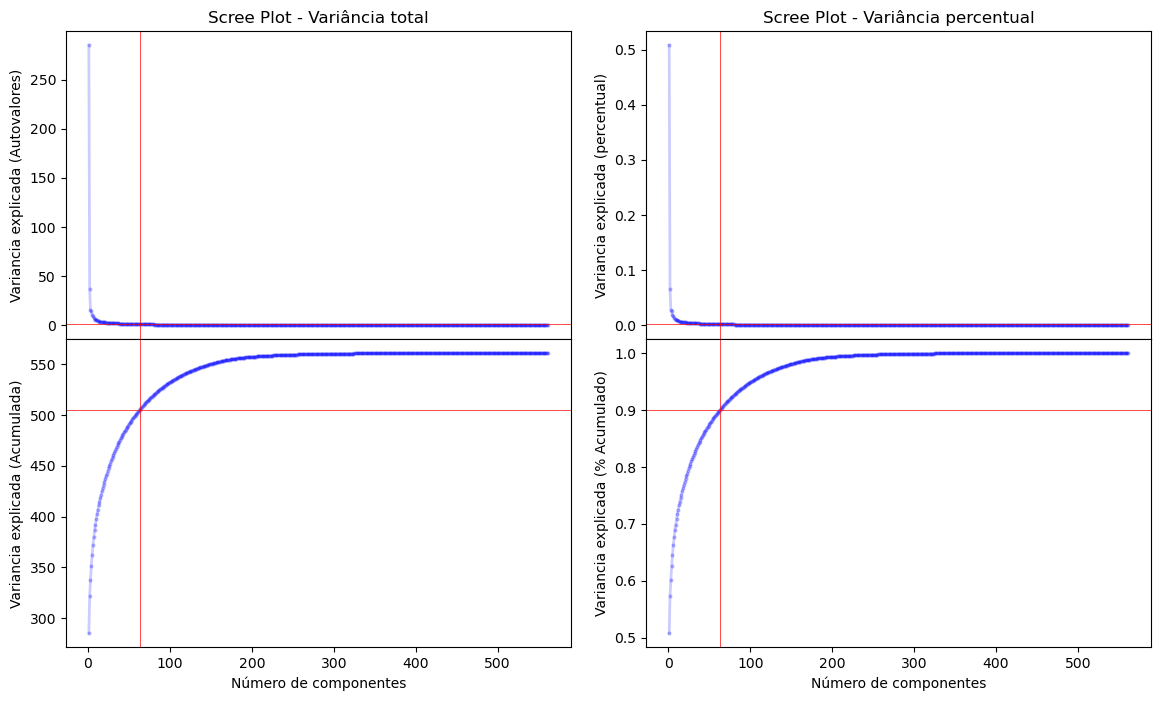

non scaled
Número de componentes:............... 34
Variância da ultima CP:.............. 0.13
Variância total explicada:........... 50.15
Variância percentual da última CP:... 0.24%
Variância percentual total explicada: 90.09%


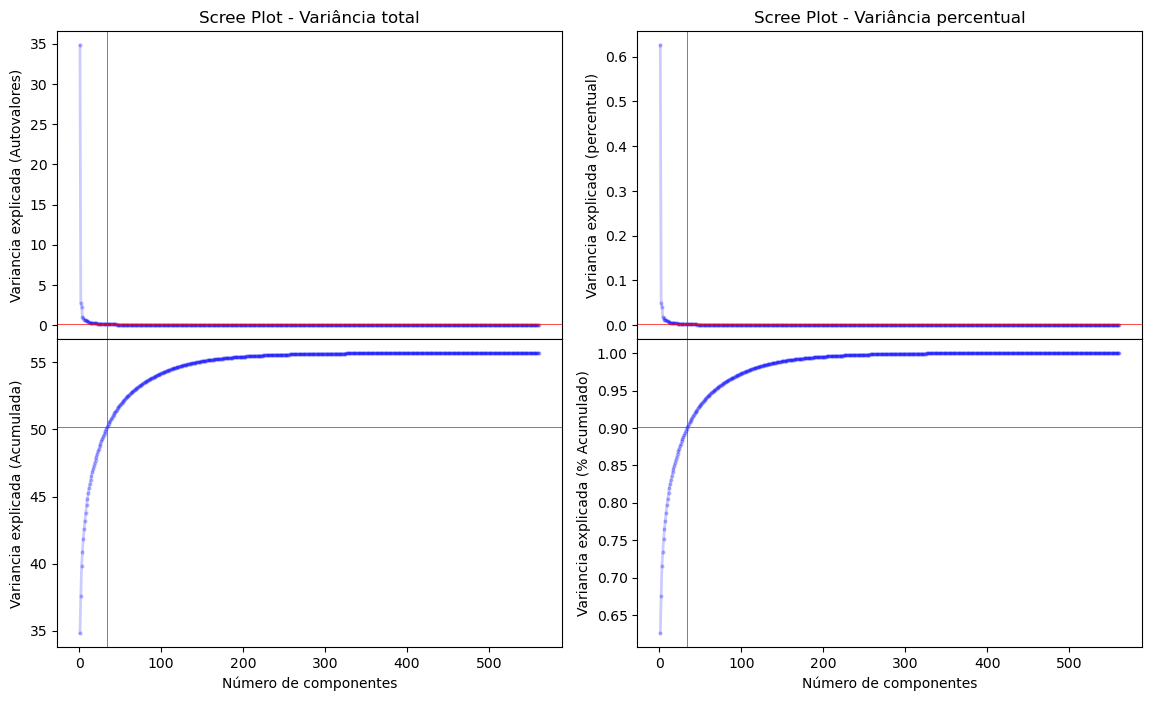

34

In [61]:

pca_scaled = PCA()
pca_scaled.fit(X_train_scaled)

pca = PCA()
pca.fit(X_train)

print('scaled')
screeplot(pca_scaled, varexplicada=0.9)
print('non scaled')
screeplot(pca, varexplicada=0.9)



## Árvore com PCA

Faça duas uma árvore de decisão com 10 componentes principais - uma com base em dados padronizados e outra sem padronizar. Utilize o ```ccp_alpha=0.001```.

Compare a acurácia na base de treino e teste.

##### Ampliei a análise para um grid search com mais valores de n_components para observar o comportamento ao longo dos componentes principais.

In [62]:
%%time

# utilizar GridSearchCV para encontrar o melhor valor de n_components para o PCA scaled e não scaled
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

pca = PCA()
dt = DecisionTreeClassifier(ccp_alpha=0.001)

pipe = Pipeline(steps=[('pca', pca), ('dt', dt)])


param_grid = {'pca__n_components': np.arange(1, 150, 5)}

grid_search = GridSearchCV(pipe, param_grid, n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

grid_search_nonscaled = GridSearchCV(pipe, param_grid, n_jobs=-1)
grid_search_nonscaled.fit(X_train, y_train)


CPU times: total: 1.06 s
Wall time: 28.5 s


GridSearchCV(estimator=Pipeline(steps=[('pca', PCA()),
                                       ('dt',
                                        DecisionTreeClassifier(ccp_alpha=0.001))]),
             n_jobs=-1,
             param_grid={'pca__n_components': array([  1,   6,  11,  16,  21,  26,  31,  36,  41,  46,  51,  56,  61,
        66,  71,  76,  81,  86,  91,  96, 101, 106, 111, 116, 121, 126,
       131, 136, 141, 146])})

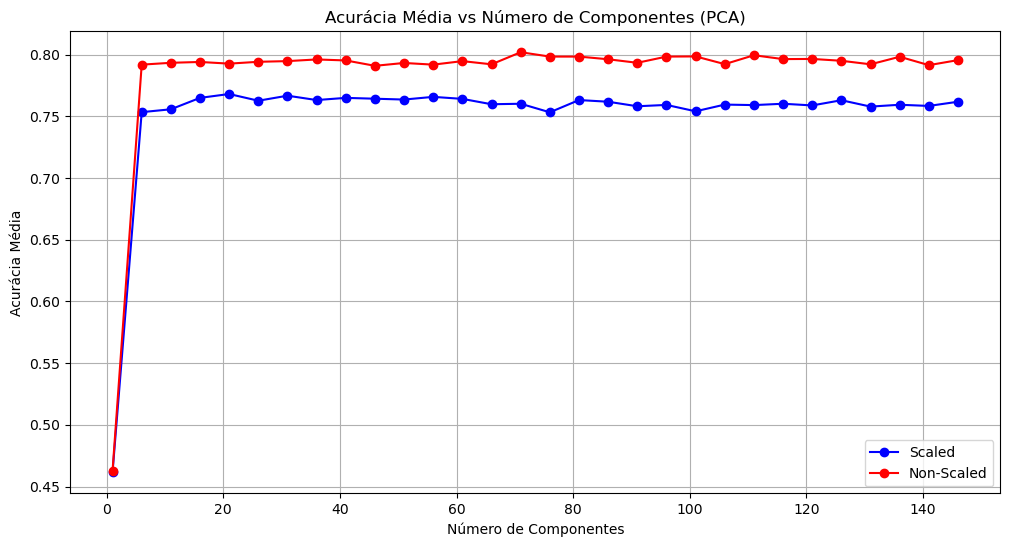

Acurácia do modelo com PCA (scaled): 0.78
Acurácia do modelo com PCA (non-scaled): 0.83
Melhor número de componentes (scaled): {'pca__n_components': 21}
Melhor número de componentes (non-scaled): {'pca__n_components': 71}


In [63]:
import pandas as pd

# Converter os resultados em um DataFrame para análise
results_scaled = pd.DataFrame(grid_search.cv_results_)
results_nonscaled = pd.DataFrame(grid_search_nonscaled.cv_results_)
# Extração dos valores de interesse para o gráfico
n_components_scaled = results_scaled['param_pca__n_components'].astype(float)
scores_scaled = results_scaled['mean_test_score'].astype(float)

n_components_nonscaled = results_nonscaled['param_pca__n_components'].astype(float)
scores_nonscaled = results_nonscaled['mean_test_score'].astype(float)

# Plotar os resultados
plt.figure(figsize=(12, 6))
plt.plot(n_components_scaled, scores_scaled, 'o-', label='Scaled', color='blue')
plt.plot(n_components_nonscaled, scores_nonscaled, 'o-', label='Non-Scaled', color='red')

# Adicionar títulos e legendas
plt.xlabel('Número de Componentes')
plt.ylabel('Acurácia Média')
plt.title('Acurácia Média vs Número de Componentes (PCA)')
plt.legend()
plt.grid()
plt.show()


# testar melhor modelo na base de teste
from sklearn.metrics import accuracy_score

best_model_scaled = grid_search.best_estimator_
best_model_scaled.fit(X_train_scaled, y_train)

best_model_nonscaled = grid_search_nonscaled.best_estimator_
best_model_nonscaled.fit(X_train, y_train)

y_pred_scaled = best_model_scaled.predict(X_test_scaled)
y_pred_nonscaled = best_model_nonscaled.predict(X_test)

acc_scaled = accuracy_score(y_test, y_pred_scaled)
acc_nonscaled = accuracy_score(y_test, y_pred_nonscaled)

print(f'Acurácia do modelo com PCA (scaled): {acc_scaled:.2f}')
print(f'Acurácia do modelo com PCA (non-scaled): {acc_nonscaled:.2f}')
print(f'Melhor número de componentes (scaled): {grid_search.best_params_}')
print(f'Melhor número de componentes (non-scaled): {grid_search_nonscaled.best_params_}')


### Performance com Gradient Boosting com PCA e StandardScaler para comparação.

In [64]:

# utilizar GridSearchCV para encontrar o melhor valor de n_components para o PCA scaled e não scaled
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.ensemble import HistGradientBoostingClassifier

pca = PCA()
gbm = HistGradientBoostingClassifier(
    learning_rate=0.1,
    max_iter=50,
    max_leaf_nodes=31,
    max_depth=3,
    random_state=42
)

# Ajustar classes para começarem em 0
y_train_adjusted = y_train - y_train.min()
y_test_adjusted = y_test - y_train.min()

# transformar y em array unidimensional
y_train_adjusted = y_train_adjusted.squeeze()
y_test_adjusted = y_test_adjusted.squeeze()

pipe = Pipeline(steps=[('pca', pca), ('gbm', gbm)])

param_grid = {'pca__n_components': np.arange(1, 150, 5)}

grid_search = GridSearchCV(pipe, param_grid, n_jobs=-1)
grid_search.fit(X_train_scaled, y_train_adjusted)

grid_search_nonscaled = GridSearchCV(pipe, param_grid, n_jobs=-1)
grid_search_nonscaled.fit(X_train, y_train_adjusted)
#performance na base de teste




GridSearchCV(estimator=Pipeline(steps=[('pca', PCA()),
                                       ('gbm',
                                        HistGradientBoostingClassifier(max_depth=3,
                                                                       max_iter=50,
                                                                       random_state=42))]),
             n_jobs=-1,
             param_grid={'pca__n_components': array([  1,   6,  11,  16,  21,  26,  31,  36,  41,  46,  51,  56,  61,
        66,  71,  76,  81,  86,  91,  96, 101, 106, 111, 116, 121, 126,
       131, 136, 141, 146])})

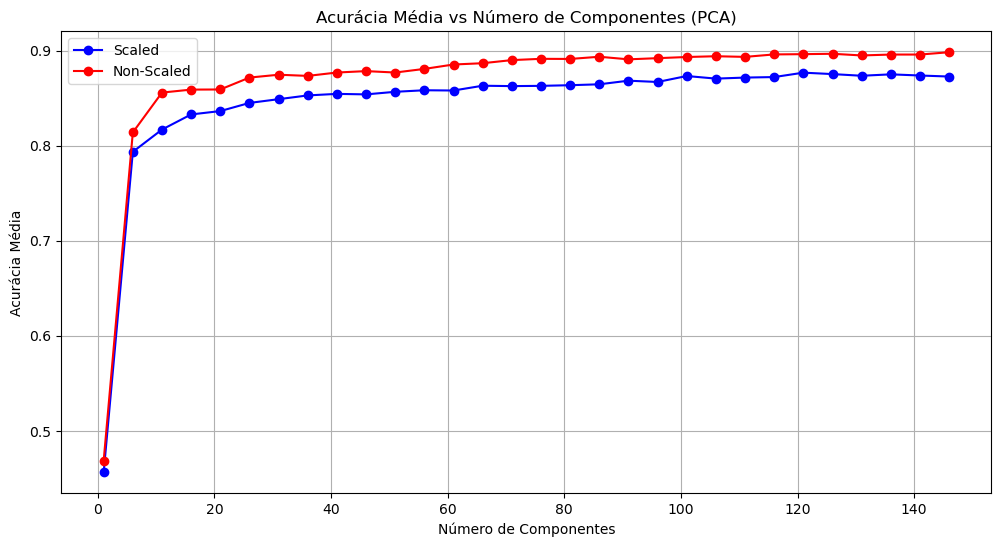

Acurácia do modelo com PCA (scaled): 0.90
Acurácia do modelo com PCA (non-scaled): 0.91
Melhor número de componentes (scaled): {'pca__n_components': 121}
Melhor número de componentes (non-scaled): {'pca__n_components': 146}


In [69]:

# Converter os resultados em um DataFrame para análise
results_scaled = pd.DataFrame(grid_search.cv_results_)
results_nonscaled = pd.DataFrame(grid_search_nonscaled.cv_results_)
# Extração dos valores de interesse para o gráfico
n_components_scaled = results_scaled['param_pca__n_components'].astype(float)
scores_scaled = results_scaled['mean_test_score'].astype(float)

n_components_nonscaled = results_nonscaled['param_pca__n_components'].astype(float)
scores_nonscaled = results_nonscaled['mean_test_score'].astype(float)

# Plotar os resultados
plt.figure(figsize=(12, 6))
plt.plot(n_components_scaled, scores_scaled, 'o-', label='Scaled', color='blue')
plt.plot(n_components_nonscaled, scores_nonscaled, 'o-', label='Non-Scaled', color='red')

# Adicionar títulos e legendas
plt.xlabel('Número de Componentes')
plt.ylabel('Acurácia Média')
plt.title('Acurácia Média vs Número de Componentes (PCA)')
plt.legend()
plt.grid()
plt.show()


# testar melhor modelo na base de teste
from sklearn.metrics import accuracy_score

y_train = y_train.values.ravel()
y_test = y_test.values.ravel()


best_model_scaled = grid_search.best_estimator_
best_model_scaled.fit(X_train_scaled, y_train)

best_model_nonscaled = grid_search_nonscaled.best_estimator_
best_model_nonscaled.fit(X_train, y_train)

y_pred_scaled = best_model_scaled.predict(X_test_scaled)
y_pred_nonscaled = best_model_nonscaled.predict(X_test)

acc_scaled = accuracy_score(y_test, y_pred_scaled)
acc_nonscaled = accuracy_score(y_test, y_pred_nonscaled)

print(f'Acurácia do modelo com PCA (scaled): {acc_scaled:.2f}')
print(f'Acurácia do modelo com PCA (non-scaled): {acc_nonscaled:.2f}')
print(f'Melhor número de componentes (scaled): {grid_search.best_params_}')
print(f'Melhor número de componentes (non-scaled): {grid_search_nonscaled.best_params_}')


#### Conclusão
    Tanto com Decision tree quanto com Gradient boosting, a padronização das variáveis trouxe uma perda de acurácia. Isso pode ser explicado pelos tipos de dados que temos, que são dados de sensores, que em sua maioria já estão em uma mesma escala. mas é sempre bom testar para ter certeza.